In [1]:
import mahotas

# Declare a class descriptor for computing the moments of the images

In [2]:
class ZernikeMoments:
    def __init__(self, radius):
    #Store the size of the radius used while computing the moments of the image
        self.radius = radius
    
    def describe(self, image):
        #Return the zernike moments for the image
        return mahotas.features.zernike_moments(image, self.radius)    

Import the libraries

In [3]:
import numpy as np
import _pickle as cPickle
import glob
import cv2
import matplotlib.pyplot as plt
import os

Initialize the descriptor with a radius of 21 and store the moments in dict

In [4]:
desc = ZernikeMoments(21)
index = {}

Load an image from the given file path

In [5]:
image = cv2.imread('/home/anirudh/wav2img.png')

In [6]:
image.shape

(280, 1800, 3)

Convert the image from 1 colorspace to another(Grayspace)

In [1]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

NameError: name 'cv2' is not defined

In [8]:
image.shape

(280, 1800)

Pad the image with extra white pixels to ensure the edges of the pokemon are not up against the borders of the image

In [9]:
image = cv2.copyMakeBorder(image, 15,15,15,15, cv2.BORDER_CONSTANT,value = 255)

In [10]:
image.shape

(310, 1830)

Invert the image and threshold it

In [11]:
thresh = cv2.bitwise_not(image)

In [12]:
thresh.shape

(310, 1830)

In [13]:
thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
thresh[thresh > 0] = 255

In [15]:
thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Initialize the outline image, find the outermost contours( the outline ) of the pokemon and draw it

In [16]:
outline = np.zeros(image.shape, dtype= "uint8")

In [17]:
outline.shape

(310, 1830)

findContours( image, mode,contours) -> image,contours,hierarchy

RETR_EXTERNAL: Find only the outermost contours

CHAIN_APPROX_SIMPLE: compress and approximate the contours to save the memory

In [18]:
_,cnts,hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [19]:
cnts[0].shape

(4, 1, 2)

**Hierarchy**: Sometimes, shapes are inside other shapes in an image. In these cases, we call the external shape as parent shape and and internal one as the child shape. We have assigned a hierarchy for these images

[Hierarchy](https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html)

In [20]:
cnts = sorted(cnts, key= cv2.contourArea, reverse= True)[0]

In [21]:
cnts.shape

(4, 1, 2)

In [22]:
cv2.drawContours(outline, [cnts],-1, 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Compute the Zernike moments of the shape of the outline

In [23]:
moments = desc.describe(outline)

In [24]:
moments

array([3.18309886e-01, 4.67550711e-18, 7.09795743e-03, 1.26524258e-16,
       4.63273858e-18, 3.34812266e-18, 1.14045122e-02, 1.02330189e-16,
       4.89346587e-03, 4.57924450e-18, 3.12150185e-18, 1.11070941e-17,
       1.50338433e-02, 8.14478192e-17, 6.63415095e-03, 1.93663514e-17,
       2.54635798e-18, 4.49441658e-18, 3.08677798e-18, 7.02845943e-18,
       1.76504557e-02, 4.47535040e-17, 8.06051157e-03, 5.36686337e-18,
       5.13944149e-03])

In [25]:
index['wav2png'] = moments

In [26]:
img = cv2.imread('/home/anirudh/wav2img.png',0)

In [27]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [28]:
cv2.imwrite('wavgray.png',img)

True

In [29]:
from matplotlib import pyplot as plt

In [30]:
img = cv2.imread('/home/anirudh/wav2img.png',0)

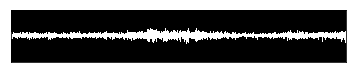

In [31]:
plt.imshow(img,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

In [32]:
cap = cv2.VideoCapture(0)

In [33]:
img = np.zeros((512,512,3), np.uint8)

In [34]:
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)

In [35]:
events = [i for i in dir(cv2) if 'EVENT' in i]

In [36]:
img = cv2.imread('/home/anirudh/wav2img.png')

In [37]:
px = img[100,100]

In [38]:
print(px)

[0 0 0]


In [39]:
blue = img[100,100,0]

In [40]:
desc = ZernikeMoments(21)
dataset = {}

In [41]:
filename = "wav2img.png"
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0,0.04)

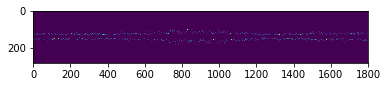

In [42]:
plt.imshow(dst)

In [43]:
%pwd

'/home/anirudh'

In [44]:
import cv2

In [45]:
image = cv2.imread("/home/anirudh/wav2img.png",0)

In [46]:
image.shape

(280, 1800)

In [47]:
image.shape

(280, 1800)

In [48]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

error: /tmp/build/80754af9/opencv_1512687413662/work/modules/imgproc/src/color.cpp:11048: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [ ]:
image.shape

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.imshow(image)

In [ ]:
imagecol = cv2.imread('wav2img.png')

In [ ]:
imagegray = cv2.cvtColor(imagecol, cv2.COLOR_BGR2GRAY)

In [ ]:
imagegray

In [ ]:
imagegray.shape

In [ ]:
plt.imshow(imagegray)

In [ ]:
imgborder = cv2.copyMakeBorder(imagegray,15,15,15,15,cv2.BORDER_CONSTANT, value = 255)

In [ ]:
plt.imshow(imgborder)

In [ ]:
threshImg = cv2.bitwise_not(imagecol)

In [ ]:
plt.imshow(threshImg)

In [ ]:
threshImgGray = cv2.bitwise_not(imagegray) 

In [ ]:
plt.imshow(threshImgGray)

In [ ]:
threshImg.shape

In [ ]:
threshImg[threshImg > 0] = 255

In [ ]:
threshImg

In [ ]:
outlineImg = np.zeros(imagecol.shape, dtype="uint8")

In [ ]:
outlineImg.shape

In [ ]:
outlineGr = np.zeros(imagegray.shape, dtype="uint8")

In [ ]:
outlineGr.shape

In [ ]:
_,cnts,hierarchy = cv2.findContours(threshImgGray.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
cntsArr = sorted(cnts,key=cv2.contourArea,reverse=True)[0]

In [ ]:
cv2.drawContours(outlineGr,[cntsArr],-1,255,-1)

In [ ]:
momentsGr = desc.describe(outlineGr)

In [ ]:
import os

# Testing the pokemon zernike descriptor dataset

In [ ]:
os.chdir('/home/anirudh/Desktop/pokedex-zernike/sprites/')

In [ ]:
%pwd

In [ ]:
image = cv2.imread("abra.png")

In [ ]:
image.shape

In [ ]:
plt.imshow(image)

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
plt.imshow(image)

In [ ]:
image = cv2.copyMakeBorder(image,15,15,15,15, cv2.BORDER_CONSTANT,value = 255)

In [ ]:
plt.imshow(image)

In [ ]:
thresh = cv2.bitwise_not(image)

In [ ]:
plt.imshow(thresh)

In [ ]:
thresh[thresh > 0] = 255

In [ ]:
plt.imshow(thresh)

In [ ]:
outline = np.zeros(image.shape, dtype= "uint8")

In [ ]:
_,cnts,_ = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
cnts = sorted(cnts,key= cv2.contourArea,reverse=True)[0]

In [ ]:
cnts

In [ ]:
cv2.drawContours(outline,[cnts],-1,255,-1)

In [ ]:
moments = desc.describe(outline)

In [ ]:
plt.imshow(outline)

In [204]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

 # Test if the process is same for a waveform image

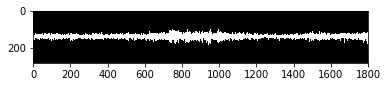

In [206]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('wav2img.png')     
gray = rgb2gray(img)    
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [220]:
gray_img = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

error: /tmp/build/80754af9/opencv_1512687413662/work/modules/imgproc/src/color.cpp:11065: error: (-215) scn == 1 && (dcn == 3 || dcn == 4) in function cvtColor


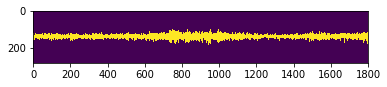

In [221]:
plt.imshow(gray_img)

In [217]:
gray_img.shape

(280, 1800)

In [181]:
os.chdir('/home/anirudh/')

In [182]:
image = cv2.imread("wav2img.png")

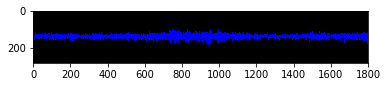

In [183]:
plt.imshow(image)

In [188]:
image = cv2.cvtColor(image, cv2.COLOR_BAYER_BG2BGRA)

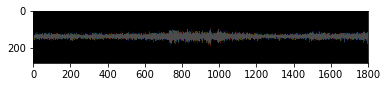

In [189]:
plt.imshow(image)

from PIL import Image
gray_img = Image.open("wav2img.png").convert('LA')
gray_img.save("gray_img.png")

image = cv2.imread("gray_img.png")

plt.imshow(image)

In [201]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

error: /tmp/build/80754af9/opencv_1512687413662/work/modules/imgproc/src/color.cpp:11048: error: (-215) scn == 3 || scn == 4 in function cvtColor


image = cv2.copyMakeBorder(image, 15,15,15,15,cv2.BORDER_CONSTANT, value = 255)

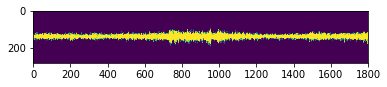

In [202]:
plt.imshow(image)

In [193]:
thresh = cv2.bitwise_not(image)

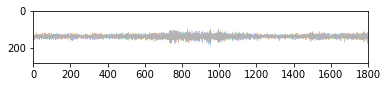

In [194]:
plt.imshow(thresh)

In [196]:
outline = np.zeros(image.shape,dtype= "uint8")

In [197]:
_,cnts,_ = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

error: /tmp/build/80754af9/opencv_1512687413662/work/modules/imgproc/src/contours.cpp:199: error: (-210) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function cvStartFindContours_Impl


In [178]:
image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [52]:
cnts = sorted(cnts,key= cv2.contourArea, reverse= True)[0]

NameError: name 'cnts' is not defined

In [53]:
cnts

NameError: name 'cnts' is not defined

In [54]:
cv2.drawContours(outline,[cnts],-1,255,-1)

NameError: name 'cnts' is not defined

In [195]:
moments = desc.describe(thresh)

ValueError: too many values to unpack (expected 2)

In [56]:
moments

NameError: name 'moments' is not defined

In [16]:
from PIL import Image

# Preparing the Zernike descriptors dataset

In [57]:
index = 0
for path in glob.glob('/home/anirudh/Desktop/OUR project images/' + "/*.png"):
    imgName = (path.split('/')[-1]).replace(".png","")
    
    #Load the image from the file
    image = cv2.imread(path)
    
    #Convert the image from RGB to Gray
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Pad the image with extra white pixels
    image = cv2.copyMakeBorder(image,15,15,15,15, cv2.BORDER_CONSTANT, value = 255)
    
    #Invert the image and threshold it
    thresh = cv2.bitwise_not(image)
        
    #Initialize the outline image, find the outermost contours(outline) of the image, then draw it
    outline = np.zeros(image.shape, np.uint8)
        
    _,cnts,hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    cv2.drawContours(outline, [cnts],-1,255,-1)
    
    moments = desc.describe(thresh)
    dataset[imgName] = moments
    imageNames.insert(index,imgName)
    index += 1

NameError: name 'dataset' is not defined

# Test on one image

In [49]:
import os
import matplotlib.pyplot as plt

In [50]:
os.chdir('/home/anirudh/Desktop/OUR project images/drilling')

In [51]:
%pwd

'/home/anirudh/Desktop/OUR project images/drilling'

In [52]:
image = cv2.imread('518.png')

In [53]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [54]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [55]:
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [56]:
image.shape

(288, 432)

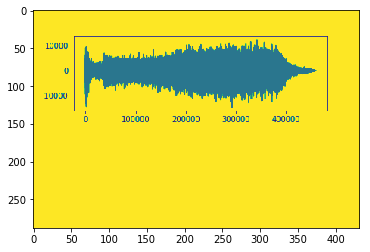

In [57]:
plt.imshow(image)

In [58]:
image = cv2.copyMakeBorder(image,15,15,15,15, cv2.BORDER_CONSTANT, value = 255)

In [59]:
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

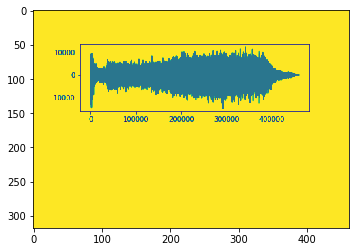

In [60]:
plt.imshow(image)

In [61]:
thresh = cv2.bitwise_not(image)

In [62]:
thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

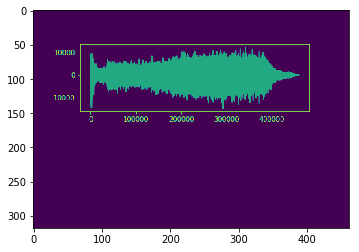

In [63]:
plt.imshow(thresh)

In [64]:
outline = np.zeros(image.shape,np.uint8)

In [65]:
outline

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [66]:
_,cnts,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [67]:
cnts

[array([[[343, 155]],
 
        [[343, 162]],
 
        [[347, 162]],
 
        [[347, 161]],
 
        [[348, 160]],
 
        [[350, 162]],
 
        [[353, 162]],
 
        [[354, 161]],
 
        [[355, 161]],
 
        [[356, 162]],
 
        [[359, 162]],
 
        [[361, 160]],
 
        [[362, 161]],
 
        [[362, 162]],
 
        [[366, 162]],
 
        [[366, 155]],
 
        [[362, 155]],
 
        [[362, 156]],
 
        [[361, 157]],
 
        [[359, 155]],
 
        [[356, 155]],
 
        [[355, 156]],
 
        [[354, 156]],
 
        [[353, 155]],
 
        [[350, 155]],
 
        [[348, 157]],
 
        [[347, 156]],
 
        [[347, 155]]], dtype=int32), array([[[333, 155]],
 
        [[333, 156]],
 
        [[332, 157]],
 
        [[332, 158]],
 
        [[331, 159]],
 
        [[331, 160]],
 
        [[333, 160]],
 
        [[334, 161]],
 
        [[334, 162]],
 
        [[335, 162]],
 
        [[335, 161]],
 
        [[336, 160]],
 
        [[337, 161]],
 
    

In [68]:
cnts = sorted(cnts,key=cv2.contourArea, reverse=True)[0]

In [69]:
cnts

array([[[ 69,  50]],

       [[ 69,  61]],

       [[ 68,  62]],

       [[ 66,  62]],

       [[ 68,  62]],

       [[ 69,  63]],

       [[ 69,  94]],

       [[ 68,  95]],

       [[ 66,  95]],

       [[ 68,  95]],

       [[ 69,  96]],

       [[ 69, 127]],

       [[ 68, 128]],

       [[ 66, 128]],

       [[ 68, 128]],

       [[ 69, 129]],

       [[ 69, 148]],

       [[ 83, 148]],

       [[ 84, 149]],

       [[ 84, 152]],

       [[ 84, 149]],

       [[ 85, 148]],

       [[150, 148]],

       [[151, 149]],

       [[151, 152]],

       [[151, 149]],

       [[152, 148]],

       [[216, 148]],

       [[217, 149]],

       [[217, 152]],

       [[217, 149]],

       [[218, 148]],

       [[282, 148]],

       [[283, 149]],

       [[283, 152]],

       [[283, 149]],

       [[284, 148]],

       [[348, 148]],

       [[349, 149]],

       [[349, 152]],

       [[349, 149]],

       [[350, 148]],

       [[404, 148]],

       [[404,  50]]], dtype=int32)

In [70]:
cv2.drawContours(outline, [cnts],-1,255,-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [71]:
moments = desc.describe(thresh)

In [72]:
moments

array([0.31830989, 0.00141876, 0.00109114, 0.002908  , 0.00290244,
       0.00216102, 0.00188277, 0.00467153, 0.00197629, 0.00451589,
       0.00335614, 0.00518535, 0.00277594, 0.00615583, 0.00268658,
       0.00437002, 0.00631658, 0.00464248, 0.00714014, 0.009247  ,
       0.0038185 , 0.00722839, 0.00328881, 0.00584406, 0.00305053])

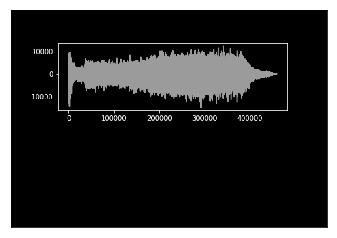

In [73]:
plt.imshow(thresh,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

# Preparing the drilling(i.e. positive examples)

index = 0
for path in glob.glob('/home/anirudh/Desktop/OUR project images/' + "/*.png"):
    imgName = (path.split('/')[-1]).replace(".png","")
    
    #Load the image from the file
    image = cv2.imread(path)
    
    #Convert the image from RGB to Gray
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Pad the image with extra white pixels
    image = cv2.copyMakeBorder(image,15,15,15,15, cv2.BORDER_CONSTANT, value = 255)
    
    #Invert the image and threshold it
    thresh = cv2.bitwise_not(image)
        
    #Initialize the outline image, find the outermost contours(outline) of the waveform, then draw it
    outline = np.zeros(image.shape, np.uint8)
        
    _,cnts,hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    cv2.drawContours(outline, [cnts],-1,255,-1)
    
    moments = desc.describe(thresh)
    dataset[imgName] = moments
    imageNames.insert(index,imgName)
    index += 1

In [74]:
drillingFeatures = {}
drillingLabels = []

In [75]:
index = 0
for path in glob.glob('/home/anirudh/Desktop/OUR project images/drilling' + "/*.png"):
    
    imgName = (path.split('/')[-1].replace(".png",""))
    
    #Load the image from the file
    image = cv2.imread(path)
    
    #Convert the image to Gray
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Pad the image with pixels to prevent overlapping at edges
    image = cv2.copyMakeBorder(image,15,15,15,15, cv2.BORDER_CONSTANT, value = 255)
    
    #Invert the image and threshold it
    thresh = cv2.bitwise_not(image)
    
    #Initialize the outline image, find the outermost contours of the waveform and plot it
    outline = np.zeros(image.shape, np.uint8)
    
    _,cnts,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key= cv2.contourArea, reverse= True)[0]
    cv2.drawContours(outline, [cnts],-1,255,-1)
    
    moments = desc.describe(thresh)
    drillingFeatures[imgName] = moments
    drillingLabels.insert(index,imgName)
    index += 1

In [76]:
len(drillingFeatures)

83

In [77]:
drillingLabels

['118278',
 '165786',
 '71088',
 '165643',
 '74922',
 '17913',
 '29722',
 '107842',
 '57584',
 '50415',
 '147764',
 '165644',
 '14110',
 '14111',
 '57696',
 '130961',
 '156362',
 '84699',
 '34621',
 '165642',
 '74965',
 '99192',
 '71079',
 '29721',
 '14115',
 '180029',
 '14113',
 '34643',
 '165640',
 '127443',
 '50416',
 '71082',
 '205874',
 '147019',
 '140824',
 '181624',
 '146244',
 '104625',
 '42324',
 '71080',
 '58937',
 '39532',
 '66622',
 '71086',
 '165645',
 '165641',
 '50414',
 '127538',
 '179212',
 '167750',
 '14114',
 '69598',
 '139000',
 '167702',
 '165785',
 '71087',
 '50413',
 '31884',
 '39533',
 '144351',
 '71171',
 '89099',
 '166931',
 '205610',
 '58005',
 '63095',
 '55020',
 '135849',
 '205878',
 '77751',
 '104817',
 '168037',
 '103357',
 '187863',
 '46668',
 '71529',
 '137815',
 '146249',
 '128607',
 '46669',
 '167701',
 '199929',
 '518']

# Prepare the children_playing,i.e. negative examples

In [78]:
childrenFeatures = {}
childrenLabels = []

In [84]:
index = 0
for path in glob.glob('/media/anirudh/New Volume/Anirudh/SNU BLACKBOARD/OUR stuff/children_' + "/*.png"):
    
    imgName = (path.split('/')[-1].replace(".png",""))
    
    #Load the image from the file
    image = cv2.imread(path)
    
    #Convert the image to Gray
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Pad the image with pixels to prevent overlapping at edges
    image = cv2.copyMakeBorder(image,15,15,15,15, cv2.BORDER_CONSTANT, value = 255)
    
    #Invert the image and threshold it
    thresh = cv2.bitwise_not(image)
    
    #Initialize the outline image, find the outermost contours of the waveform and plot it
    outline = np.zeros(image.shape, np.uint8)
    
    _,cnts,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key= cv2.contourArea, reverse= True)[0]
    cv2.drawContours(outline, [cnts],-1,255,-1)
    
    moments = desc.describe(thresh)
    childrenFeatures[imgName] = moments
    childrenLabels.insert(index,imgName)
    index += 1

In [85]:
len(childrenFeatures)

110

In [86]:
len(childrenLabels)

110

# Prepare the street_music,i.e. negative examples

In [87]:
streetFeatures = {}
streetLabels = []

In [88]:
index = 0
for path in glob.glob('/media/anirudh/New Volume/Anirudh/SNU BLACKBOARD/OUR stuff/street_music' + "/*.png"):
    
    imgName = (path.split('/')[-1].replace(".png",""))
    
    #Load the image from the file
    image = cv2.imread(path)
    
    #Convert the image to Gray
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Pad the image with pixels to prevent overlapping at edges
    image = cv2.copyMakeBorder(image,15,15,15,15, cv2.BORDER_CONSTANT, value = 255)
    
    #Invert the image and threshold it
    thresh = cv2.bitwise_not(image)
    
    #Initialize the outline image, find the outermost contours of the waveform and plot it
    outline = np.zeros(image.shape, np.uint8)
    
    _,cnts,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key= cv2.contourArea, reverse= True)[0]
    cv2.drawContours(outline, [cnts],-1,255,-1)
    
    moments = desc.describe(thresh)
    streetFeatures[imgName] = moments
    streetLabels.insert(index,imgName)
    index += 1

In [89]:
streetLabels

['14385',
 '173891',
 '42955',
 '101848',
 '108041',
 '108357',
 '109263',
 '113601',
 '115239',
 '115240',
 '115241',
 '115242',
 '115243',
 '115415',
 '115418',
 '117889',
 '122738',
 '124489',
 '128152',
 '132108',
 '136558',
 '137156',
 '14386',
 '14387',
 '14527',
 '147491',
 '149254',
 '149929',
 '155044',
 '155127',
 '155227',
 '155242',
 '155243',
 '157940',
 '161702',
 '164344',
 '168713',
 '168906',
 '171184',
 '171478',
 '172519',
 '180057',
 '182103',
 '185374',
 '186336',
 '186339',
 '189825',
 '196384',
 '203424',
 '203654',
 '21683',
 '21684',
 '26270',
 '31973',
 '34866',
 '36263',
 '36264',
 '41364',
 '42953',
 '42954',
 '55728',
 '66000',
 '66324',
 '66599',
 '71866',
 '73277',
 '74226',
 '74458',
 '79377',
 '89442',
 '89443',
 '94182',
 '94631',
 '96475',
 '96920',
 '96921',
 '98202',
 '98263',
 '99157',
 '99710']

In [90]:
len(streetLabels)

80

# Prepare the set of car_horn, i.e negative examples

In [91]:
carFeatures = {}
carLabels = []

In [92]:
index = 0
for path in glob.glob('/media/anirudh/New Volume/Anirudh/SNU BLACKBOARD/OUR stuff/Car_horn' + "/*.png"):
    
    imgName = (path.split('/')[-1].replace(".png",""))
    
    #Load the image from the file
    image = cv2.imread(path)
    
    #Convert the image to Gray
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Pad the image with pixels to prevent overlapping at edges
    image = cv2.copyMakeBorder(image,15,15,15,15, cv2.BORDER_CONSTANT, value = 255)
    
    #Invert the image and threshold it
    thresh = cv2.bitwise_not(image)
    
    #Initialize the outline image, find the outermost contours of the waveform and plot it
    outline = np.zeros(image.shape, np.uint8)
    
    _,cnts,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key= cv2.contourArea, reverse= True)[0]
    cv2.drawContours(outline, [cnts],-1,255,-1)
    
    moments = desc.describe(thresh)
    carFeatures[imgName] = moments
    carLabels.insert(index,imgName)
    index += 1

In [93]:
len(carFeatures)

101

In [94]:
carLabels

['162541',
 '175849',
 '179866',
 '42101',
 '107090',
 '117536',
 '118070',
 '118496',
 '125520',
 '138465',
 '138468',
 '143115',
 '14524',
 '145577',
 '151359',
 '153057',
 '155129',
 '155130',
 '155234',
 '156091',
 '156194',
 '161010',
 '162540',
 '162702',
 '162703',
 '162728',
 '164625',
 '164626',
 '164627',
 '170243',
 '17074',
 '17124',
 '17307',
 '174840',
 '174841',
 '175842',
 '175843',
 '175844',
 '175845',
 '175846',
 '175847',
 '175848',
 '175850',
 '175851',
 '175852',
 '175853',
 '175854',
 '175855',
 '175856',
 '176003',
 '176631',
 '176634',
 '176638',
 '178115',
 '179858',
 '179860',
 '179861',
 '179862',
 '179863',
 '179864',
 '179865',
 '179867',
 '179868',
 '180156',
 '182474',
 '184355',
 '187356',
 '18933',
 '19026',
 '24074',
 '24076',
 '26176',
 '26177',
 '26185',
 '26186',
 '27068',
 '28808',
 '2937',
 '29932',
 '32417',
 '43802',
 '43803',
 '44278',
 '46391',
 '49974',
 '52102',
 '54086',
 '54187',
 '57607',
 '58202',
 '65472',
 '66115',
 '68657',
 '73168',

# Prepare the set of siren, ie. negative examples

In [95]:
sirenFeatures = {}
sirenLabels = []

In [96]:
index = 0
for path in glob.glob('/media/anirudh/New Volume/Anirudh/SNU BLACKBOARD/OUR stuff/siren_pics' + "/*.png"):
    
    imgName = (path.split('/')[-1].replace(".png",""))
    
    #Load the image from the file
    image = cv2.imread(path)
    
    #Convert the image to Gray
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Pad the image with pixels to prevent overlapping at edges
    image = cv2.copyMakeBorder(image,15,15,15,15, cv2.BORDER_CONSTANT, value = 255)
    
    #Invert the image and threshold it
    thresh = cv2.bitwise_not(image)
    
    #Initialize the outline image, find the outermost contours of the waveform and plot it
    outline = np.zeros(image.shape, np.uint8)
    
    _,cnts,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key= cv2.contourArea, reverse= True)[0]
    cv2.drawContours(outline, [cnts],-1,255,-1)
    
    moments = desc.describe(thresh)
    sirenFeatures[imgName] = moments
    sirenLabels.insert(index,imgName)
    index += 1

In [97]:
len(sirenFeatures)

58

In [98]:
sirenLabels

['159743',
 '102853',
 '102871',
 '105289',
 '107357',
 '111671',
 '117181',
 '118279',
 '121528',
 '123688',
 '133473',
 '135160',
 '148632',
 '157648',
 '157866',
 '157867',
 '157868',
 '158608',
 '159738',
 '159742',
 '159744',
 '159745',
 '159747',
 '159748',
 '159750',
 '159751',
 '159752',
 '159753',
 '159754',
 '159755',
 '164053',
 '164782',
 '165166',
 '16772',
 '184623',
 '188004',
 '203913',
 '208652',
 '22601',
 '24347',
 '26173',
 '34952',
 '42117',
 '43805',
 '43806',
 '54898',
 '57323',
 '62878',
 '66601',
 '71177',
 '74726',
 '88121',
 '90014',
 '90846',
 '94636',
 '96657',
 '98525',
 '98536']

# Prepare the set of air_conditioner, i.e negative examples

In [99]:
airFeatures = {}
airLabels = []

In [100]:
index = 0
for path in glob.glob('/media/anirudh/New Volume/Anirudh/SNU BLACKBOARD/OUR stuff/air_pics' + "/*.png"):
    
    imgName = (path.split('/')[-1].replace(".png",""))
    
    #Load the image from the file
    image = cv2.imread(path)
    
    #Convert the image to Gray
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Pad the image with pixels to prevent overlapping at edges
    image = cv2.copyMakeBorder(image,15,15,15,15, cv2.BORDER_CONSTANT, value = 255)
    
    #Invert the image and threshold it
    thresh = cv2.bitwise_not(image)
    
    #Initialize the outline image, find the outermost contours of the waveform and plot it
    outline = np.zeros(image.shape, np.uint8)
    
    _,cnts,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key= cv2.contourArea, reverse= True)[0]
    cv2.drawContours(outline, [cnts],-1,255,-1)
    
    moments = desc.describe(thresh)
    airFeatures[imgName] = moments
    airLabels.insert(index,imgName)
    index += 1

In [101]:
airLabels

['101729',
 '121285',
 '121286',
 '127872',
 '127873',
 '134717',
 '146709',
 '146714',
 '146845',
 '147926',
 '151977',
 '153261',
 '162103',
 '165454',
 '166942',
 '167464',
 '170245',
 '178686',
 '185709',
 '189023',
 '202516',
 '202517',
 '204240',
 '30204',
 '35382',
 '47160',
 '50901',
 '56385',
 '57320',
 '60846',
 '62461',
 '63724',
 '73524',
 '74507',
 '80589',
 '83502']

In [102]:
len(airFeatures)

36

# Prepare the set of dog_bark, i.e. negative examples

In [103]:
dogFeatures = {}
dogLabels = []

In [104]:
index = 0
for path in glob.glob('/media/anirudh/New Volume/Anirudh/SNU BLACKBOARD/OUR stuff/dog_bark' + "/*.png"):
    
    imgName = (path.split('/')[-1].replace(".png",""))
    
    #Load the image from the file
    image = cv2.imread(path)
    
    #Convert the image to Gray
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Pad the image with pixels to prevent overlapping at edges
    image = cv2.copyMakeBorder(image,15,15,15,15, cv2.BORDER_CONSTANT, value = 255)
    
    #Invert the image and threshold it
    thresh = cv2.bitwise_not(image)
    
    #Initialize the outline image, find the outermost contours of the waveform and plot it
    outline = np.zeros(image.shape, np.uint8)
    
    _,cnts,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key= cv2.contourArea, reverse= True)[0]
    cv2.drawContours(outline, [cnts],-1,255,-1)
    
    moments = desc.describe(thresh)
    dogFeatures[imgName] = moments
    dogLabels.insert(index,imgName)
    index += 1

In [105]:
dogLabels

['100032',
 '102102',
 '102103',
 '102104',
 '102105',
 '102106',
 '105088',
 '107190',
 '108187',
 '110134',
 '110371',
 '110389',
 '110688',
 '110918',
 '113785',
 '114280',
 '114587',
 '115411',
 '115535',
 '116484',
 '116485',
 '117048',
 '11722',
 '117271',
 '118072',
 '118101',
 '118961',
 '118962',
 '118963',
 '118964',
 '119420',
 '121888',
 '125523',
 '125554',
 '125574',
 '128030',
 '128470',
 '128891',
 '131199',
 '137803',
 '142641',
 '14358',
 '146343',
 '150341',
 '152588',
 '155294',
 '155299',
 '155309',
 '155310',
 '155311',
 '155312',
 '155313',
 '155314',
 '155315',
 '155317',
 '155320',
 '156418',
 '157649',
 '157950',
 '158607',
 '159176',
 '159726',
 '160092',
 '160093',
 '160094',
 '160575',
 '161922',
 '161923',
 '162148',
 '163459',
 '164311',
 '164312',
 '166268',
 '166421',
 '166489',
 '170015',
 '173994',
 '173995',
 '174026',
 '17486',
 '174873',
 '174994',
 '175915',
 '175917',
 '17810',
 '178118',
 '179386',
 '180052',
 '180256',
 '180257',
 '180977',
 '1

In [106]:
len(dogFeatures)

213

# Prepare the set of engine_idling,i.e. negative examples

In [107]:
engFeatures = {}
engLabels = []

In [108]:
index = 0
for path in glob.glob('/media/anirudh/New Volume/Anirudh/SNU BLACKBOARD/OUR stuff/engine' + "/*.png"):
    
    imgName = (path.split('/')[-1].replace(".png",""))
    
    #Load the image from the file
    image = cv2.imread(path)
    
    #Convert the image to Gray
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Pad the image with pixels to prevent overlapping at edges
    image = cv2.copyMakeBorder(image,15,15,15,15, cv2.BORDER_CONSTANT, value = 255)
    
    #Invert the image and threshold it
    thresh = cv2.bitwise_not(image)
    
    #Initialize the outline image, find the outermost contours of the waveform and plot it
    outline = np.zeros(image.shape, np.uint8)
    
    _,cnts,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key= cv2.contourArea, reverse= True)[0]
    cv2.drawContours(outline, [cnts],-1,255,-1)
    
    moments = desc.describe(thresh)
    engFeatures[imgName] = moments
    engLabels.insert(index,imgName)
    index += 1

In [109]:
engLabels

['156358',
 '23218',
 '102857',
 '102858',
 '103249',
 '103258',
 '103438',
 '106014',
 '106015',
 '107228',
 '119449',
 '119455',
 '123685',
 '12812',
 '128160',
 '144068',
 '146186',
 '151877',
 '152908',
 '154758',
 '15544',
 '156634',
 '166101',
 '16692',
 '17578',
 '176638',
 '17853',
 '186935',
 '186936',
 '186938',
 '186940',
 '187075',
 '19338',
 '195451',
 '200786',
 '201652',
 '201988',
 '209864',
 '209992',
 '21187',
 '23219',
 '26184',
 '39847',
 '39852',
 '39854',
 '39856',
 '39857',
 '39884',
 '46918',
 '49769',
 '50454',
 '50455',
 '50661',
 '50668',
 '50898',
 '62564',
 '62566',
 '62567',
 '78651',
 '81068',
 '89724',
 '89948',
 '91209',
 '91533',
 '94632',
 '94710']

In [110]:
len(engFeatures)

66

# Prepare the set of gun_shot images, i.e. negative examples

In [111]:
gunLabels = []
gunFeatures = {}

In [112]:
index = 0
for path in glob.glob('/media/anirudh/New Volume/Anirudh/SNU BLACKBOARD/OUR stuff/Gun_imgs' + "/*.png"):
    
    imgName = (path.split('/')[-1].replace(".png",""))
    
    #Load the image from the file
    image = cv2.imread(path)
    
    #Convert the image to Gray
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Pad the image with pixels to prevent overlapping at edges
    image = cv2.copyMakeBorder(image,15,15,15,15, cv2.BORDER_CONSTANT, value = 255)
    
    #Invert the image and threshold it
    thresh = cv2.bitwise_not(image)
    
    #Initialize the outline image, find the outermost contours of the waveform and plot it
    outline = np.zeros(image.shape, np.uint8)
    
    _,cnts,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key= cv2.contourArea, reverse= True)[0]
    cv2.drawContours(outline, [cnts],-1,255,-1)
    
    moments = desc.describe(thresh)
    gunFeatures[imgName] = moments
    gunLabels.insert(index,imgName)
    index += 1

In [113]:
gunLabels

['157207',
 '162436',
 '205013',
 '102305',
 '106955',
 '110622',
 '111048',
 '122690',
 '131571',
 '133797',
 '136399',
 '145608',
 '145609',
 '145611',
 '145612',
 '145683',
 '147317',
 '148166',
 '149177',
 '151065',
 '151069',
 '151071',
 '158977',
 '158978',
 '158979',
 '159701',
 '159702',
 '159703',
 '159704',
 '159705',
 '159706',
 '159707',
 '159708',
 '159709',
 '159710',
 '161195',
 '162431',
 '162432',
 '162433',
 '162434',
 '162435',
 '163460',
 '164646',
 '164667',
 '169261',
 '174282',
 '174284',
 '174285',
 '174287',
 '174289',
 '174290',
 '174292',
 '174293',
 '174294',
 '180960',
 '191449',
 '196400',
 '197318',
 '197320',
 '200460',
 '25037',
 '25038',
 '25039',
 '34708',
 '35799',
 '35800',
 '36403',
 '37236',
 '46654',
 '46655',
 '46656',
 '50618',
 '64346',
 '7060',
 '7061',
 '7062',
 '7063',
 '7064',
 '7065',
 '7066',
 '7067',
 '7068',
 '76089',
 '76090',
 '76091',
 '76093',
 '76094',
 '77246',
 '77247',
 '78776',
 '84254',
 '86278',
 '87562',
 '93139']

In [114]:
len(gunFeatures)

94

# Prepare the set of Jack_hammer, i.e positive examples

In [115]:
jackLabels = []
jackFeatures = {}

In [116]:
index = 0
for path in glob.glob('/media/anirudh/New Volume/Anirudh/SNU BLACKBOARD/OUR stuff/jack_pics' + "/*.png"):
    
    imgName = (path.split('/')[-1].replace(".png",""))
    
    #Load the image from the file
    image = cv2.imread(path)
    
    #Convert the image to Gray
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Pad the image with pixels to prevent overlapping at edges
    image = cv2.copyMakeBorder(image,15,15,15,15, cv2.BORDER_CONSTANT, value = 255)
    
    #Invert the image and threshold it
    thresh = cv2.bitwise_not(image)
    
    #Initialize the outline image, find the outermost contours of the waveform and plot it
    outline = np.zeros(image.shape, np.uint8)
    
    _,cnts,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key= cv2.contourArea, reverse= True)[0]
    cv2.drawContours(outline, [cnts],-1,255,-1)
    
    moments = desc.describe(thresh)
    jackFeatures[imgName] = moments
    jackLabels.insert(index,imgName)
    index += 1

In [117]:
jackLabels

['103074',
 '104998',
 '105029',
 '110621',
 '131918',
 '156893',
 '165774',
 '165775',
 '169098',
 '171305',
 '174276',
 '178260',
 '178261',
 '187920',
 '24728',
 '30206',
 '31884',
 '33340',
 '42097',
 '62837',
 '73623',
 '77751',
 '90013',
 '97606',
 '98223',
 '98859']

In [118]:
len(jackFeatures)

26

# Performing the classification

We will create the positive examples dataset by combining th jackhammer and drilling examples. For negative examples, we will combine the remaining

# Preparing the positive labels

In [119]:
len(drillingFeatures)

83

In [120]:
len(jackFeatures)

26

In [121]:
indLabels = drillingLabels + jackLabels

In [122]:
len(indLabels)

109

In [123]:
indFeatures = dict(drillingFeatures)
indFeatures.update(jackFeatures)

In [124]:
drillSet = set(drillingFeatures)
jackSet = set(jackFeatures)

for name in drillSet.intersection(jackSet):
    print(name, jackFeatures[name])

31884 [0.31830989 0.08279908 0.13741699 0.14080028 0.03683506 0.05325534
 0.01393844 0.03029611 0.05016818 0.0307799  0.04249703 0.02710281
 0.01542471 0.02226638 0.01133584 0.01364291 0.03415199 0.02654263
 0.02587029 0.01738597 0.00043515 0.01317003 0.03616123 0.04492616
 0.03295216]
77751 [0.31830989 0.07529392 0.00905958 0.12319381 0.05745369 0.02758056
 0.10666925 0.1185158  0.12344359 0.07284003 0.04719239 0.0456691
 0.05836523 0.0418209  0.07668773 0.06317371 0.06337722 0.0532189
 0.06166409 0.04532448 0.08220689 0.00817923 0.00106913 0.00588948
 0.02897855]


We will remove the duplicate labels

In [125]:
del(jackLabels[jackLabels.index('31884')])

In [126]:
del(drillingLabels[drillingLabels.index('31884')])

In [127]:
len(drillingLabels)

82

In [128]:
len(jackLabels)

25

In [129]:
del(drillingFeatures['31884'])

In [130]:
len(drillingFeatures)

82

In [131]:
del(jackFeatures['31884'])

In [132]:
len(jackFeatures)

25

In [133]:
del(jackLabels[jackLabels.index('77751')])

In [134]:
del(drillingLabels[drillingLabels.index('77751')])

In [135]:
del(drillingFeatures['77751'])

In [136]:
del(jackFeatures['77751'])

In [137]:
len(jackLabels)

24

In [138]:
len(drillingLabels)

81

In [139]:
len(jackFeatures)

24

In [140]:
len(drillingFeatures)

81

In [141]:
indLabels = drillingLabels + jackLabels

In [142]:
len(indLabels)

105

In [143]:
indFeatures = dict(drillingFeatures)
indFeatures.update(jackFeatures)

In [355]:
len(indFeatures)

105

Preparing the set of negative examples for the classification

In [324]:
negIndLabels = childrenLabels + streetLabels + carLabels + sirenLabels + airLabels + dogLabels + engLabels + gunLabels

In [325]:
len(negIndLabels)

757

# Creating the features data 

In [356]:
negIndFeatures = dict(childrenFeatures)
negIndFeatures.update(streetFeatures)

In [357]:
len(negIndFeatures)

190

In [358]:
sum2 = len(childrenLabels ) + len(streetLabels)
sum2

190

In [359]:
negIndFeatures.update(carFeatures)

In [360]:
len(negIndFeatures)

291

In [361]:
sum3 = sum2 + len(carLabels)
sum3

291

In [362]:
negIndFeatures.update(sirenFeatures)

In [363]:
len(negIndFeatures)

349

In [364]:
sum4 = sum3 + len(sirenLabels)
sum4

349

In [365]:
negIndFeatures.update(airFeatures)

In [366]:
len(negIndFeatures)

385

In [337]:
sum5 = sum4 + len(airLabels)
sum5

385

In [367]:
negIndFeatures.update(dogFeatures)

In [368]:
len(negIndFeatures)

598

In [369]:
sum6 = sum5 + len(dogLabels)
sum6

598

In [370]:
negIndFeatures.update(engFeatures)

In [371]:
len(negIndFeatures)

663

In [290]:
sum7 = sum6 + len(engLabels)
sum7

663

In [373]:
len(negIndLabels)

757

In [374]:
len(engLabels)

65

In [380]:
len(negIndFeatures)

663

In [381]:
len(engFeatures)

65

In [382]:
negIndFeatures.update(engFeatures)

In [383]:
sum7 = sum6 + len(engLabels)
sum7

663

In [384]:
len(negIndFeatures)

663

In [386]:
sum8 = sum7 + len(gunLabels)
sum8

757

In [385]:
len(negIndFeatures) + len(gunFeatures)

757

In [387]:
negIndFeatures.update(gunFeatures)

In [388]:
len(negIndFeatures)

757

# Combining the datasets for performing classification

In [393]:
labels = indLabels + negIndLabels

In [394]:
len(labels)

862

In [265]:
len(negIndLabels) + len(indLabels)

862

In [395]:
type(indLabels)

list

In [396]:
X = np.array(labels,dtype=np.int32)

In [397]:
type(X)

numpy.ndarray

In [399]:
len(negIndFeatures) + len(indFeatures)

862

In [400]:
features = dict(indFeatures)
features.update(negIndFeatures)

In [401]:
len(features)

862

In [402]:
featArr = np.zeros((862,25))

In [403]:
featInd = np.zeros(862)

In [404]:
count = 0
for key in features:
    featInd[count] = int(key)
    count += 1

In [405]:
featInd.shape

(862,)

In [406]:
count = 0
for i in range(len(featInd)):
    count += 1
    print(features.get(str(int(featInd[i]))))
    featArr[i] = features.get(str(int(featInd[i])))

[3.18309886e-01 1.14432770e-01 1.98485072e-01 2.30131349e-01
 1.21049752e-01 1.26119291e-01 7.12583251e-02 1.32213839e-01
 8.29955577e-02 9.69814513e-02 7.53338571e-02 6.63459445e-02
 4.88362967e-02 4.03217097e-02 6.98284951e-02 6.87773818e-02
 5.35699738e-02 1.26536431e-02 2.31042506e-02 1.06292646e-02
 2.37954261e-04 2.42319873e-02 5.43628028e-02 5.95150841e-02
 4.45048706e-02]
[0.31830989 0.00118722 0.00304222 0.00149966 0.00252459 0.00267123
 0.00496488 0.00244556 0.00168886 0.00415114 0.00422086 0.00472982
 0.00670633 0.00331036 0.00199172 0.0025023  0.00617866 0.00596503
 0.0065557  0.00365945 0.0081534  0.0040661  0.00189166 0.0033722
 0.00432729]
[0.31830989 0.00101055 0.00040246 0.00211982 0.00202682 0.00271029
 0.00072972 0.00346988 0.00204407 0.00305076 0.00416146 0.00688485
 0.00113862 0.00473048 0.00277496 0.00631483 0.00407224 0.0057184
 0.00959989 0.00235941 0.00164736 0.00589599 0.00344237 0.00780737
 0.00100095]
[0.31830989 0.00153593 0.00201591 0.00191314 0.00280432 0

 0.00217318]
[0.31830989 0.0719835  0.08164488 0.04483502 0.0185517  0.06784031
 0.00814325 0.00607874 0.04783628 0.01078724 0.00987182 0.05749005
 0.02126    0.02780958 0.04485385 0.01819961 0.01069683 0.02323202
 0.04738165 0.05679217 0.0010218  0.00387591 0.02932933 0.00690657
 0.01672154]
[0.31830989 0.02574188 0.0913689  0.0198504  0.04510524 0.0700339
 0.10777552 0.07876218 0.09772636 0.04248538 0.02569448 0.01878816
 0.06097252 0.06600627 0.08649015 0.07188726 0.02845377 0.06138544
 0.05880436 0.05566161 0.02256039 0.02078961 0.0061518  0.01161736
 0.00942627]
[0.31830989 0.06054328 0.00888168 0.06326693 0.09037091 0.094119
 0.03148001 0.04818088 0.06480409 0.11697196 0.11782302 0.11607248
 0.08422912 0.06555574 0.10844935 0.10651136 0.06431862 0.04948121
 0.02824787 0.03125575 0.06217909 0.02155607 0.02475551 0.03675138
 0.05399912]
[0.31830989 0.00189475 0.00166621 0.00212726 0.00386978 0.00077388
 0.0024579  0.00349816 0.00506689 0.0059876  0.00100619 0.00107753
 0.00274658 0

In [407]:
featArr[0]

array([3.18309886e-01, 1.14432770e-01, 1.98485072e-01, 2.30131349e-01,
       1.21049752e-01, 1.26119291e-01, 7.12583251e-02, 1.32213839e-01,
       8.29955577e-02, 9.69814513e-02, 7.53338571e-02, 6.63459445e-02,
       4.88362967e-02, 4.03217097e-02, 6.98284951e-02, 6.87773818e-02,
       5.35699738e-02, 1.26536431e-02, 2.31042506e-02, 1.06292646e-02,
       2.37954261e-04, 2.42319873e-02, 5.43628028e-02, 5.95150841e-02,
       4.45048706e-02])

In [408]:
features.get(str(int(featInd[0])))

array([3.18309886e-01, 1.14432770e-01, 1.98485072e-01, 2.30131349e-01,
       1.21049752e-01, 1.26119291e-01, 7.12583251e-02, 1.32213839e-01,
       8.29955577e-02, 9.69814513e-02, 7.53338571e-02, 6.63459445e-02,
       4.88362967e-02, 4.03217097e-02, 6.98284951e-02, 6.87773818e-02,
       5.35699738e-02, 1.26536431e-02, 2.31042506e-02, 1.06292646e-02,
       2.37954261e-04, 2.42319873e-02, 5.43628028e-02, 5.95150841e-02,
       4.45048706e-02])

In [409]:
X[0]

118278

In [410]:
X.shape

(862,)

In [411]:
featArr.shape

(862, 25)

In [412]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(featArr,X,test_size = 0.3)

In [413]:
X_train.shape

(603, 25)

In [414]:
y_train.shape

(603,)

In [415]:
X_test.shape

(259, 25)

In [416]:
y_test.shape

(259,)

# Performing the one vs all classification with drilling as the positive and rest as negative classes

In [217]:
posLabels = np.array(drillingLabels,dtype=np.int32)

In [221]:
posLabels.shape

(81,)

In [222]:
len(drillingFeatures)

81

In [231]:
drillInd = np.zeros(len(drillingLabels))

In [232]:
len(drillInd)

81

In [234]:
count = 0
for key in drillingFeatures:
    drillInd[count] = int(key)
    count += 1

In [235]:
drillInd

array([118278., 165786.,  71088., 165643.,  74922.,  17913.,  29722.,
       107842.,  57584.,  50415., 147764., 165644.,  14110.,  14111.,
        57696., 130961., 156362.,  84699.,  34621., 165642.,  74965.,
        99192.,  71079.,  29721.,  14115., 180029.,  14113.,  34643.,
       165640., 127443.,  50416.,  71082., 205874., 147019., 140824.,
       181624., 146244., 104625.,  42324.,  71080.,  58937.,  39532.,
        66622.,  71086., 165645., 165641.,  50414., 127538., 179212.,
       167750.,  14114.,  69598., 139000., 167702., 165785.,  71087.,
        50413.,  39533., 144351.,  71171.,  89099., 166931., 205610.,
        58005.,  63095.,  55020., 135849., 205878., 104817., 168037.,
       103357., 187863.,  46668.,  71529., 137815., 146249., 128607.,
        46669., 167701., 199929.,    518.])

In [250]:
posFeatures = np.zeros((81,25))

In [251]:
posFeatures.shape

(81, 25)

In [252]:
count = 0
for i in range(len(drillInd)):
    count += 1
    print(drillingFeatures.get(str(int(featInd[i]))))
    posFeatures[i] = drillingFeatures.get(str(int(drillInd[i])))

[3.18309886e-01 1.14432770e-01 1.98485072e-01 2.30131349e-01
 1.21049752e-01 1.26119291e-01 7.12583251e-02 1.32213839e-01
 8.29955577e-02 9.69814513e-02 7.53338571e-02 6.63459445e-02
 4.88362967e-02 4.03217097e-02 6.98284951e-02 6.87773818e-02
 5.35699738e-02 1.26536431e-02 2.31042506e-02 1.06292646e-02
 2.37954261e-04 2.42319873e-02 5.43628028e-02 5.95150841e-02
 4.45048706e-02]
[0.31830989 0.00118722 0.00304222 0.00149966 0.00252459 0.00267123
 0.00496488 0.00244556 0.00168886 0.00415114 0.00422086 0.00472982
 0.00670633 0.00331036 0.00199172 0.0025023  0.00617866 0.00596503
 0.0065557  0.00365945 0.0081534  0.0040661  0.00189166 0.0033722
 0.00432729]
[0.31830989 0.00101055 0.00040246 0.00211982 0.00202682 0.00271029
 0.00072972 0.00346988 0.00204407 0.00305076 0.00416146 0.00688485
 0.00113862 0.00473048 0.00277496 0.00631483 0.00407224 0.0057184
 0.00959989 0.00235941 0.00164736 0.00589599 0.00344237 0.00780737
 0.00100095]
[0.31830989 0.00153593 0.00201591 0.00191314 0.00280432 0

In [253]:
posFeatures.shape

(81, 25)

In [254]:
posFeatures

array([[0.31830989, 0.11443277, 0.19848507, ..., 0.0543628 , 0.05951508,
        0.04450487],
       [0.31830989, 0.00118722, 0.00304222, ..., 0.00189166, 0.0033722 ,
        0.00432729],
       [0.31830989, 0.00101055, 0.00040246, ..., 0.00344237, 0.00780737,
        0.00100095],
       ...,
       [0.31830989, 0.02898526, 0.00547653, ..., 0.01353355, 0.00691333,
        0.01281935],
       [0.31830989, 0.1359169 , 0.13669685, ..., 0.02437238, 0.04032344,
        0.03964615],
       [0.31830989, 0.00141876, 0.00109114, ..., 0.00328881, 0.00584406,
        0.00305053]])

In [257]:
featArr.shape

(862, 25)

In [258]:
X.shape

(862,)

In [262]:
featArr.shape

(862, 25)

In [417]:
#SVM classifier
from sklearn import svm
clf = svm.SVC(kernel='linear', C =1,random_state=20).fit(X_train,y_train)
acc_svm = round(clf.score(X_test,y_test)*100,2)
print(acc_svm)

0.0


In [418]:
jackFeatures['103074']

array([3.18309886e-01, 1.17891601e-03, 1.64912048e-03, 2.18878164e-03,
       2.42975770e-03, 4.09644841e-05, 2.37125684e-03, 3.60395942e-03,
       3.27578179e-03, 3.81207385e-03, 2.25808677e-04, 1.62020531e-03,
       2.49921847e-03, 4.95111782e-03, 4.27192095e-03, 1.51189302e-03,
       5.35774020e-03, 5.94459781e-04, 1.95083549e-03, 2.71996187e-03,
       1.74990523e-03, 6.19998660e-03, 4.86869248e-03, 2.00916603e-03,
       4.00282710e-04])

In [422]:
carFeatures['155129']

array([3.18309886e-01, 1.17866818e-03, 2.60890671e-04, 3.60877642e-03,
       2.31850404e-03, 1.59980625e-03, 2.86976016e-04, 5.73657852e-03,
       4.40849576e-03, 3.38841091e-03, 2.49632060e-03, 4.06108082e-03,
       8.94239474e-05, 7.41287355e-03, 6.15723695e-03, 5.95014278e-03,
       4.37242457e-03, 3.48374300e-03, 5.51708859e-03, 4.54197682e-03,
       4.21354987e-04, 8.39721932e-03, 7.86042428e-03, 6.68810512e-03,
       4.51893635e-03])

In [423]:
jackFeatures['103074'] == carFeatures['155129']

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [424]:
drillingFeatures['42324']

array([0.31830989, 0.00103603, 0.0010508 , 0.00089306, 0.00211275,
       0.00208511, 0.00167512, 0.00163153, 0.00374957, 0.00325211,
       0.00323946, 0.00179449, 0.00217154, 0.00259922, 0.00504566,
       0.00564872, 0.00443606, 0.00454141, 0.00282294, 0.00491768,
       0.00246541, 0.00391187, 0.00614359, 0.00729712, 0.00410187])

# We will use spectrogram images for the process of classification

In [44]:
os.chdir('/media/anirudh/New Volume/Anirudh/SNU BLACKBOARD/OUR stuff/UrbanSound/data/drill_spectogrampics')

In [45]:
image = cv2.imread('518.png',0)

In [46]:
image

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [59, 65, 60, ..., 43, 32, 11],
       [64, 65, 64, ..., 25, 13,  8],
       [68, 69, 67, ...,  9,  3,  0]], dtype=uint8)

In [47]:
image.shape

(1024, 1024)

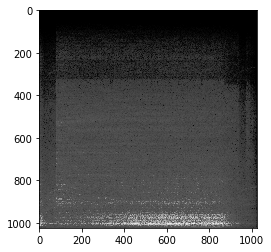

In [49]:
plt.imshow(image, cmap='gray')

In [26]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

error: /tmp/build/80754af9/opencv_1512687413662/work/modules/imgproc/src/color.cpp:11048: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [25]:
image.shape

(1024, 1024)

In [12]:
image = cv2.copyMakeBorder(image,15,15,15,15,cv2.BORDER_CONSTANT,value = 255)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('518.png')     
gray = rgb2gray(img)    
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.imsave("gray.png",gray)
plt.show()

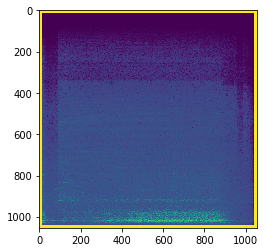

In [13]:
plt.imshow(image)

In [14]:
thresh = cv2.bitwise_not(image)

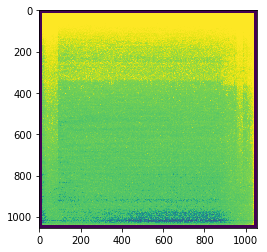

In [15]:
plt.imshow(thresh)

In [16]:
    outline = np.zeros(image.shape, np.uint8)
    
    _,cnts,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key= cv2.contourArea, reverse= True)[0]
    cv2.drawContours(outline, [cnts],-1,255,-1)
    

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
  moments = desc.describe(thresh)

In [19]:
moments

array([0.31830989, 0.00206952, 0.00535597, 0.00064691, 0.00223825,
       0.0018418 , 0.00761493, 0.00134326, 0.00216726, 0.00284113,
       0.00304773, 0.0027927 , 0.01005419, 0.00173169, 0.00379594,
       0.00035469, 0.00422312, 0.00202581, 0.00379516, 0.00131349,
       0.01231197, 0.00265264, 0.00346828, 0.00285041, 0.00457173])

In [32]:
import scipy.misc
import scipy.ndimage

# Load an example image
# Use scipy.ndimage.imread(file_name, mode='L') if you have your own
img = cv2.imread("518.png")

# Convert the image
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
img_gray = R * 299. / 1000 + G * 587. / 1000 + B * 114. / 1000

# Show the image
scipy.misc.imshow(img_gray)



/home/anirudh/yes/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `imshow` is deprecated!
`imshow` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``matplotlib.pyplot.imshow`` instead.
  from ipykernel import kernelapp as app


In [31]:
plt.imsave("gray518.png",img_gray)

In [50]:
from PIL import Image
img = Image.open("518.png").convert('LA')
img.save("greyscale_518.png")
img.show("greyscale_518.png")

In [41]:
gray_518 = cv2.imread("greyscale_518.png",0)

In [66]:
gray_518

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [59, 65, 60, ..., 43, 32, 11],
       [64, 65, 64, ..., 25, 13,  8],
       [68, 69, 67, ...,  9,  3,  0]], dtype=uint8)

In [61]:
image = cv2.imread("518.png")

In [68]:
gray_518

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [59, 65, 60, ..., 43, 32, 11],
       [64, 65, 64, ..., 25, 13,  8],
       [68, 69, 67, ...,  9,  3,  0]], dtype=uint8)

In [69]:
thresh = cv2.bitwise_not(gray_518)

In [70]:
thresh

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [196, 190, 195, ..., 212, 223, 244],
       [191, 190, 191, ..., 230, 242, 247],
       [187, 186, 188, ..., 246, 252, 255]], dtype=uint8)

In [80]:
moments_thresh = desc.describe(thresh)

In [81]:
moments_thresh

array([3.18309886e-01, 3.57581347e-03, 6.05441839e-04, 1.23522928e-03,
       2.94727061e-03, 3.05795507e-03, 2.81389269e-04, 1.94668425e-03,
       3.60050446e-03, 7.80491494e-03, 3.48810581e-03, 2.09190872e-03,
       5.70196331e-04, 2.79597601e-03, 6.18620288e-03, 3.01748125e-03,
       1.09324174e-02, 2.80396061e-03, 1.65761667e-03, 4.96779030e-03,
       6.44832175e-04, 2.49538476e-03, 6.38778413e-03, 2.52387684e-03,
       3.30252008e-03])

In [82]:
moments_gray518 = desc.describe(gray_518)

In [83]:
moments_gray518

array([0.31830989, 0.00365072, 0.00302336, 0.00590794, 0.00253512,
       0.00303196, 0.00301615, 0.00416129, 0.00355223, 0.00248644,
       0.00108234, 0.00066171, 0.00623416, 0.01130892, 0.00889572,
       0.0069475 , 0.00505692, 0.0062621 , 0.00193151, 0.00930059,
       0.00062068, 0.00661864, 0.00911194, 0.0059579 , 0.00624429])

In [84]:
moments_gray518 == moments_thresh

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

# Convert 1 RGB image to grayscale image

In [14]:
os.chdir('/media/anirudh/New Volume/Anirudh/SNU BLACKBOARD/OUR stuff/UrbanSound/data/drill_spectogrampics')

In [16]:
image = cv2.imread('50415.png')

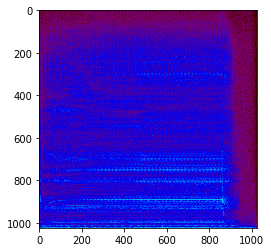

In [17]:
plt.imshow(image)

In [19]:
from PIL import Image
img = Image.open('50415.png').convert('LA')
img.save('greyscale_50415.png')
img.show('greyscale_50415.png')

In [22]:
gray_50415 = cv2.imread('greyscale_50415.png',0)

In [23]:
gray_50415

array([[ 15,  16,  20, ...,   2,   5,   6],
       [ 23,  26,  25, ...,   5,   5,   6],
       [ 23,  25,  25, ...,  12,   9,   6],
       ...,
       [121, 115, 146, ...,  62,  65,  64],
       [108, 139, 165, ...,  64,  62,  63],
       [106,  66, 145, ...,  61,  65,  62]], dtype=uint8)

In [24]:
thresh_50415 = cv2.bitwise_not(gray_50415)

In [25]:
moments_thresh50415 = desc.describe(thresh_50415)

In [26]:
moments_thresh50415

array([3.18309886e-01, 1.28824979e-03, 2.10938931e-03, 3.94340892e-03,
       2.56101150e-03, 4.45898196e-03, 1.32014574e-03, 3.45628073e-03,
       4.21974152e-03, 7.95838170e-03, 1.45059276e-03, 2.57772383e-04,
       2.04087140e-03, 4.25342594e-03, 4.88837535e-03, 4.15922641e-03,
       1.13219174e-02, 7.56735684e-04, 2.48890906e-03, 6.88619164e-03,
       2.51639275e-03, 4.63787028e-03, 7.91524428e-03, 6.25941989e-03,
       4.89161589e-03])

In [102]:
moments_gray12812 = desc.describe(gray_12812)

In [106]:
moments_gray12812 == moments_gray518

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [107]:
moments_gray12812

array([0.31830989, 0.00267545, 0.00314774, 0.00474915, 0.00293029,
       0.00144521, 0.00484181, 0.00434577, 0.00798467, 0.00584107,
       0.00276677, 0.00117435, 0.00666984, 0.00139388, 0.00570749,
       0.00243617, 0.00629988, 0.00146919, 0.0017875 , 0.00522344,
       0.00070947, 0.00174055, 0.00954362, 0.00385922, 0.00230117])

In [108]:
moments_gray518

array([0.31830989, 0.00365072, 0.00302336, 0.00590794, 0.00253512,
       0.00303196, 0.00301615, 0.00416129, 0.00355223, 0.00248644,
       0.00108234, 0.00066171, 0.00623416, 0.01130892, 0.00889572,
       0.0069475 , 0.00505692, 0.0062621 , 0.00193151, 0.00930059,
       0.00062068, 0.00661864, 0.00911194, 0.0059579 , 0.00624429])

# Convert the drilling rgb spectrogram images to grayscale images

In [28]:
os.chdir('/media/anirudh/New Volume/Anirudh/SNU BLACKBOARD/OUR stuff/UrbanSound/data/drill_spectogrampics')

In [30]:
for path in glob.glob('/media/anirudh/New Volume/Anirudh/SNU BLACKBOARD/OUR stuff/UrbanSound/data/drill_spectogrampics' + "/*.png"):
        imgName = (path.split('/')[-1].replace(".png",""))
        img = Image.open(path).convert('LA')
        
        gray_name = "gray_scale" + imgName + ".png";
        img.save(gray_name)
        print(gray_name)

gray_scale55020.png
gray_scale57584.png
gray_scale57696.png
gray_scale58005.png
gray_scale58937.png
gray_scale63095.png
gray_scale66622.png
gray_scale69598.png
gray_scale71079.png
gray_scale71080.png
gray_scale71082.png
gray_scale71086.png
gray_scale71087.png
gray_scale71088.png
gray_scale71529.png
gray_scale74922.png
gray_scale74965.png
gray_scale103357.png
gray_scale104817.png
gray_scale107842.png
gray_scale118278.png
gray_scale127443.png
gray_scale127538.png
gray_scale128607.png
gray_scale135849.png
gray_scale137815.png
gray_scale139000.png
gray_scale140824.png
gray_scale14110.png
gray_scale14111.png
gray_scale14113.png
gray_scale14114.png
gray_scale14115.png
gray_scale144351.png
gray_scale146244.png
gray_scale147019.png
gray_scale147764.png
gray_scale165640.png
gray_scale165641.png
gray_scale165642.png
gray_scale165643.png
gray_scale165644.png
gray_scale165645.png
gray_scale165785.png
gray_scale165786.png
gray_scale167701.png
gray_scale167702.png
gray_scale167750.png
gray_scale1791

# Convert the engine_idling rgb spectrogram images to grayscale images

In [37]:
os.chdir('/media/anirudh/New Volume/Anirudh/SNU BLACKBOARD/OUR stuff/UrbanSound/data/engine_spectogrampics')

In [38]:
for path in glob.glob('/media/anirudh/New Volume/Anirudh/SNU BLACKBOARD/OUR stuff/UrbanSound/data/engine_spectogrampics' + "/*.png"):
        imgName = (path.split('/')[-1].replace(".png",""))
        img = Image.open(path).convert('LA')
        
        gray_name = "gray_scale" + imgName + ".png";
        img.save(gray_name)
        print(gray_name)

gray_scale156358.png
gray_scale50455.png
gray_scale50661.png
gray_scale50668.png
gray_scale50898.png
gray_scale62564.png
gray_scale62566.png
gray_scale62567.png
gray_scale78651.png
gray_scale81068.png
gray_scale89724.png
gray_scale89948.png
gray_scale91209.png
gray_scale91533.png
gray_scale94632.png
gray_scale94710.png
gray_scale102857.png
gray_scale102858.png
gray_scale103249.png
gray_scale103258.png
gray_scale103438.png
gray_scale106014.png
gray_scale106015.png
gray_scale107228.png
gray_scale119449.png
gray_scale119455.png
gray_scale123685.png
gray_scale12812.png
gray_scale128160.png
gray_scale146186.png
gray_scale151877.png
gray_scale152908.png
gray_scale154758.png
gray_scale15544.png
gray_scale156634.png
gray_scale166101.png
gray_scale16692.png
gray_scale17578.png
gray_scale176638.png
gray_scale17853.png
gray_scale186935.png
gray_scale186936.png
gray_scale186938.png
gray_scale186940.png
gray_scale187075.png
gray_scale19338.png
gray_scale195451.png
gray_scale200786.png
gray_scale201

# Create the Zernike descriptors dataset for drilling grayscale images

In [31]:
os.chdir('/media/anirudh/New Volume/Anirudh/SNU BLACKBOARD/OUR stuff/UrbanSound/data/drill_spectogrampics')

In [32]:
gray_files = []
path = '/media/anirudh/New Volume/Anirudh/SNU BLACKBOARD/OUR stuff/UrbanSound/data/drill_spectogrampics'
for i in os.listdir(path):
    if os.path.isfile(os.path.join(path,i)) and 'gray' in i:
        gray_files.append(i)

In [33]:
len(gray_files)

79

In [34]:
drill_features = np.zeros((len(gray_files),25))

In [35]:
drill_labels = np.zeros(len(gray_files))

In [36]:
index = 0
for i in gray_files:
    gray_img = cv2.imread(i,0)
    
    print(i)
    
    thresh = cv2.bitwise_not(gray_img)
    
    moments_gray = desc.describe(thresh)
    
    drill_features[index] = moments_gray
    
    drill_labels[index] = int(i.split('e')[1].split('.')[0])
    
    index += 1
    

gray_scale57584.png
gray_scale57696.png
gray_scale58005.png
gray_scale58937.png
gray_scale63095.png
gray_scale66622.png
gray_scale69598.png
gray_scale71079.png
gray_scale71080.png
gray_scale71082.png
gray_scale71086.png
gray_scale71087.png
gray_scale71088.png
gray_scale71529.png
gray_scale74922.png
gray_scale74965.png
gray_scale77751.png
gray_scale84699.png
gray_scale89099.png
gray_scale95562.png
gray_scale99192.png
gray_scale14111.png
gray_scale167702.png
gray_scale55020.png
gray_scale14113.png
gray_scale14114.png
gray_scale14115.png
gray_scale144351.png
gray_scale146244.png
gray_scale146249.png
gray_scale147019.png
gray_scale147764.png
gray_scale165640.png
gray_scale165641.png
gray_scale165642.png
gray_scale165643.png
gray_scale165644.png
gray_scale165645.png
gray_scale165785.png
gray_scale165786.png
gray_scale167701.png
gray_scale103357.png
gray_scale104817.png
gray_scale107842.png
gray_scale118278.png
gray_scale127443.png
gray_scale127538.png
gray_scale128607.png
gray_scale135849.p

In [39]:
drill_features.shape

(79, 25)

In [40]:
drill_labels.shape

(79,)

# Create the Zernike descriptors dataset for engine_idling grayscale images

In [41]:
os.chdir('/media/anirudh/New Volume/Anirudh/SNU BLACKBOARD/OUR stuff/UrbanSound/data/engine_spectogrampics')

In [42]:
gray_files = []
path = '/media/anirudh/New Volume/Anirudh/SNU BLACKBOARD/OUR stuff/UrbanSound/data/engine_spectogrampics'
for i in os.listdir(path):
    if os.path.isfile(os.path.join(path,i)) and 'gray' in i:
        gray_files.append(i)

In [44]:
len(gray_files)

63

In [45]:
engine_features = np.zeros((len(gray_files),25))

In [46]:
engine_labels = np.zeros(len(gray_files))

In [47]:
index = 0
for i in gray_files:
    gray_img = cv2.imread(i,0)
    
    print(i)
    
    thresh = cv2.bitwise_not(gray_img)
    
    moments_gray = desc.describe(thresh)
    
    engine_features[index] = moments_gray
    
    engine_labels[index] = int(i.split('e')[1].split('.')[0])
    
    index += 1
    

gray_scale103258.png
gray_scale166101.png
gray_scale23219.png
gray_scale102857.png
gray_scale102858.png
gray_scale103249.png
gray_scale103438.png
gray_scale106014.png
gray_scale106015.png
gray_scale107228.png
gray_scale119449.png
gray_scale119455.png
gray_scale123685.png
gray_scale12812.png
gray_scale128160.png
gray_scale146186.png
gray_scale151877.png
gray_scale152908.png
gray_scale154758.png
gray_scale15544.png
gray_scale156358.png
gray_scale156634.png
gray_scale16692.png
gray_scale17578.png
gray_scale176638.png
gray_scale17853.png
gray_scale186935.png
gray_scale186936.png
gray_scale186938.png
gray_scale186940.png
gray_scale187075.png
gray_scale19338.png
gray_scale195451.png
gray_scale200786.png
gray_scale201988.png
gray_scale209864.png
gray_scale21178.png
gray_scale23218.png
gray_scale26184.png
gray_scale39847.png
gray_scale39852.png
gray_scale39854.png
gray_scale39856.png
gray_scale39857.png
gray_scale39884.png
gray_scale46918.png
gray_scale49769.png
gray_scale50454.png
gray_scale5

In [48]:
features = np.zeros((len(drill_features) + len(engine_features),25))

In [50]:
features.shape

(142, 25)

In [51]:
labels = np.zeros((len(drill_labels) + len(engine_labels)))

In [52]:
labels.shape

(142,)

In [53]:
features = np.concatenate((drill_features,engine_features), axis = 0)

In [54]:
features.shape

(142, 25)

In [55]:
labels = np.concatenate((drill_labels,engine_labels),axis = 0)

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size = 0.3)

In [57]:
X_train.shape

(99, 25)

In [59]:
X_test.shape

(43, 25)

In [60]:
y_train.shape

(99,)

In [61]:
y_test.shape

(43,)

In [62]:
#SVM classifier
from sklearn import svm
clf = svm.SVC(kernel='linear', C =1,random_state=20).fit(X_train,y_train)
acc_svm = round(clf.score(X_test,y_test)*100,2)
print(acc_svm)


0.0


In [63]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron(random_state = 0)
perceptron.fit(X_test,y_test)
acc_perceptron = round(perceptron.score(X_test,y_test)*100,2)
acc_perceptron

/home/anirudh/yes/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


2.33

In [264]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train,y_train)
acc_logreg = round(logreg.score(X_test,y_test)*100,2)
acc_logreg


0.0

In [64]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train,y_train)
acc_rand = round(random_forest.score(X_test,y_test)*100,2)
acc_rand

0.0